## TSF Task-2 Prediction using Unsupervised ML
## Author: Jalees Ahmad


### Importing all the required Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Loading the dataset

In [2]:
iris_df=pd.read_csv('Iris.csv')
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Overview of Dataset

In [3]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### Checking Null values

In [4]:
iris_df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Description of the dataset

In [5]:
iris_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


#### From above describe function we can interpret that there are 150 row. Describe function also provide other information about dataset such as mean value,max, min etc of each column.

In [6]:
iris_df.drop('Id',axis=1,inplace=True) # Dropping the id Column

In [7]:
iris_df.head() #data after dropping id column

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Count plot to visually represent number data of each species

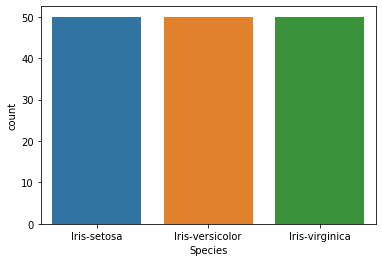

In [8]:
sns.countplot('Species',data=iris_df)
plt.show()

#### Form above graph we can interpret that there are 50 row of data of each species

### Pairplot to show pairwise relationships

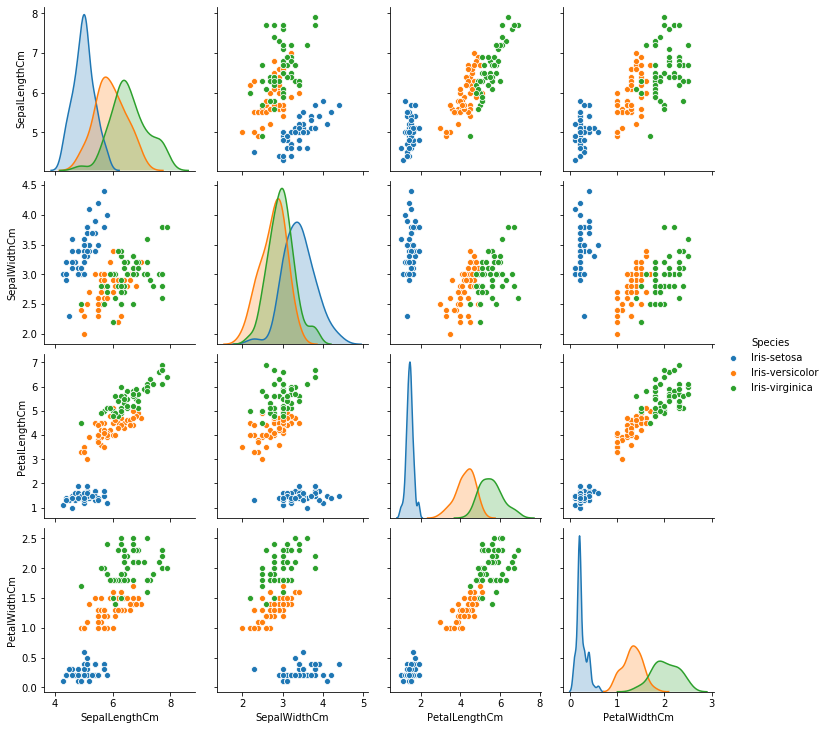

In [9]:
sns.pairplot(iris_df,hue='Species')
plt.show()

#### From above pairpot we can see data distribution of each species of each column. Form above pairplot we can observe that 'Iris-setosa' makes distinct cluster in all case.

### Heatmap to show correlation

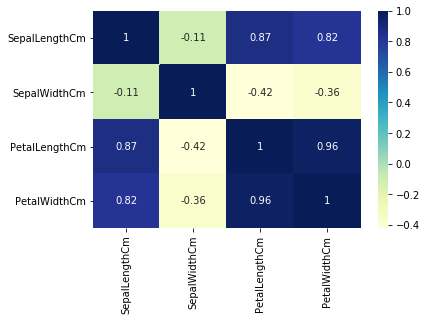

In [10]:
sns.heatmap(iris_df.corr(),annot=True,cmap="YlGnBu")

#### Above heatmap show the correlation between each columns. From above heatmap we can observe that ('PetalLength' and 'PetalWidth'), ('PetalLength' and 'SepalLength') and ('PetalWidth and SepalLength) are highly correlated.

### Histogram for data distribution

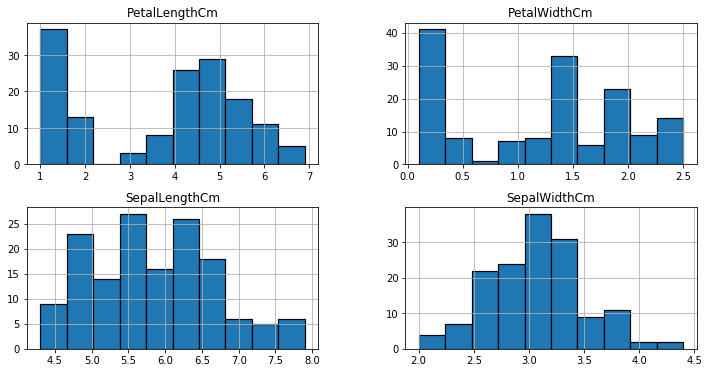

In [11]:
iris_df.hist(edgecolor='black',linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)

#### In above Histogram we can see how data is distributed in each column

### Finding the optimum number of clusters for k-means classification

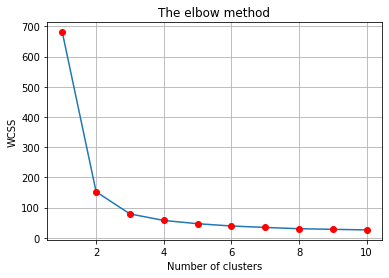

In [12]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values
# feature=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
# x = iris_df.loc[:,feature]

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.plot(range(1, 11), wcss,'bo',color='red')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.grid(True)
plt.show()

#### Form above graph we can find optimum number of cluster by observing the elbow formation point i.e 3 in above graph from where WCSS does not decrease significantly.

### Applying K-Means classifier for prediction with 3 cluster

In [13]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

In [14]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

### Scatter Plot

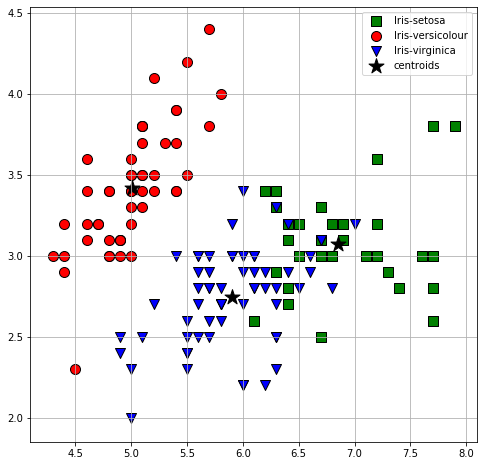

In [15]:
plt.figure(figsize=(8,8))
plt.scatter(
    x[y_kmeans == 0, 0], x[y_kmeans == 0, 1],
    s=100, c='green',
    marker='s', edgecolor='black',
    label= 'Iris-setosa'
)

plt.scatter(
    x[y_kmeans == 1, 0], x[y_kmeans == 1, 1],
    s=100, c='red',
    marker='o', edgecolor='black',
    label='Iris-versicolour'
)

plt.scatter(
    x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
    s=100, c='blue',
    marker='v', edgecolor='black',
    label='Iris-virginica'
)

# plotting the centroids
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    s=250, marker='*',
    c='black', edgecolor='black',
    label='centroids'
)
plt.legend()
plt.grid()
plt.show()

### Scatter plot for visual representation of optimal number of cluster i.e 3. In above scatter plot red dot represent 'Iris-versicolor', blue color represent 'Iris-virginica', green square represent 'Iris-setosa' and black star represent centroids.